<a href="https://colab.research.google.com/github/alejandromunizsiques/Nuevo-repositorio/blob/main/Ejercicio_de_divisi%C3%B3n_entrenar_probar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
!pip install klib
!pip install --upgrade klib
import klib as klib
from sklearn.model_selection import train_test_split

# Montaje de dataset 

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/Introducción al Machine Learning/abalone.data')
df = df.rename(columns={"M":"Sex","0.455":"Length","0.365":"Diameter","0.095":"Height","0.514":"Whole weight","0.2245":"Shucked weight","0.101":"Viscera weight","0.15":"Shell weight","15":"Rings"})
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Analisis Exploratorio Correlacional

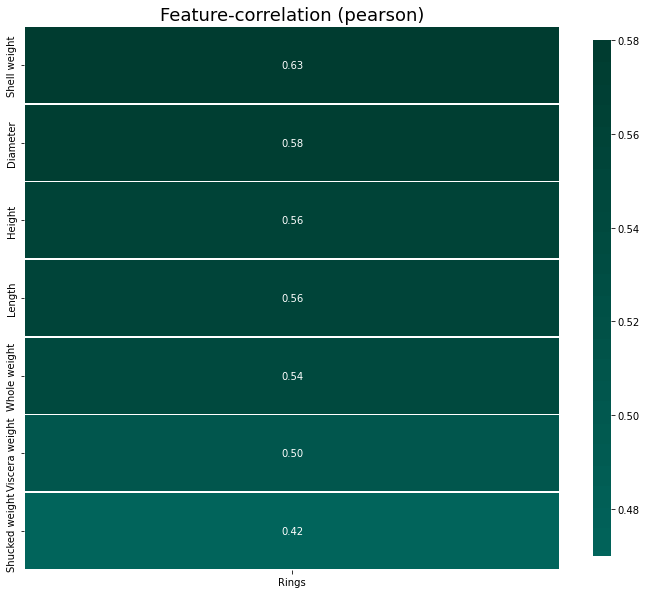

In [4]:
klib.corr_plot(df, target='Rings')

# Definicion de matriz de target , features y division para entrenamiento  ( Para regresion Lineal)

In [11]:
X = df.drop(["Rings","Sex"], axis = 1)
y = df["Rings"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# Estandarizacion de datos

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instancia KNN Regresor 

In [13]:
Regresion_KNN = KNeighborsRegressor(n_neighbors=1)
print(Regresion_KNN)

KNeighborsRegressor(n_neighbors=1)


# Entrenamiento KNN Regresor 

In [14]:
Regresion_KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

# Predicciones

In [15]:
Predicciones = Regresion_KNN.predict(X_train)
Predicciones

array([13.,  8., 13., ...,  6.,  8.,  1.])

# Evaluacion del modelo 

In [16]:
Prueba_predicciones = Regresion_KNN.predict(X_test)
Score = Regresion_KNN.score(X_test,y_test)
Score

0.22448777899492434

# Seleccion de Matriz de Features, Target y division Entrenamiento-Test para KNN- Clasificador


In [21]:
X1 = df.drop(["Sex"],axis=1)
y1 = df["Sex"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=3)

# Estandarizacion de datos

In [24]:
Scaler_1 = StandardScaler()
Scaler_1.fit(X1_train)
X1_train = Scaler_1.transform(X1_train)
X1_test = Scaler_1.transform(X1_test)

# Instancia KNN-Clasificador

In [22]:
Knn_Clasificacion = KNeighborsClassifier(n_neighbors=1)
print(Knn_Clasificacion)

KNeighborsClassifier(n_neighbors=1)


# Entrenamiento de KNN-Clasificador 

In [25]:
Knn_Clasificacion.fit(X1_train,y1_train)


KNeighborsClassifier(n_neighbors=1)

# Predicciones

In [26]:
Predicciones1 = Knn_Clasificacion.predict(X1_train)
Predicciones1

array(['I', 'M', 'M', ..., 'M', 'F', 'M'], dtype=object)

# Evaluacion de Modelo

In [27]:
Prueba_predicciones1 = Knn_Clasificacion.predict(X1_test)
Score1 = Knn_Clasificacion.score(X1_test,y1_test)
Score1

0.49137931034482757